### MIDTERM PROJECT

### LIBRARIES :

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

### READ THE DATASET :

In [ ]:
df = pd.read_csv('New York City Airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### MISSING VALUES

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### HANDLING COLUMNS WITH MISSING VALUES

In [ ]:
unique_reviews_df = pd.DataFrame(df['reviews_per_month'].unique(), columns=['unique_reviews_per_month'])

print(unique_reviews_df)

     unique_reviews_per_month
0                        0.21
1                        0.38
2                         NaN
3                        4.64
4                        0.10
..                        ...
933                      7.86
934                     11.71
935                      9.73
936                     10.91
937                     10.54

[938 rows x 1 columns]


In [ ]:
median_value = df['reviews_per_month'].median()

df['reviews_per_month'] = df['reviews_per_month'].fillna(median_value)

### DROPPING UNNECESSARY COLUMNS

In [ ]:
df.drop(columns=['name','host_id', 'host_name', 'last_review'], inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(48895, 12)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,1.238930e+00,1.520861e+00,0.01000,2.800000e-01,7.200000e-01,1.580000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [ ]:
df.columns

Index(['id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.nunique()

id                                48895
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("----------------------------------")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')
----------------------------------
Numerical Variables:
['id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [ ]:
df.dtypes

id                                  int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### COLUMNS WITH A STANDARD DEVIATION

In [ ]:
std_values = df[num_cols].std()
std_values

id                                1.098311e+07
latitude                          5.453008e-02
longitude                         4.615674e-02
price                             2.401542e+02
minimum_nights                    2.051055e+01
number_of_reviews                 4.455058e+01
reviews_per_month                 1.520861e+00
calculated_host_listings_count    3.295252e+01
availability_365                  1.316223e+02
dtype: float64

### CHECK

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

### MIN-MAX VALUES

In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    print(f'{col}: Min = {df[col].min()}, Max = {df[col].max()}')

id: Min = 2539, Max = 36487245
latitude: Min = 40.49979, Max = 40.91306
longitude: Min = -74.24442, Max = -73.71299
price: Min = 0, Max = 10000
minimum_nights: Min = 1, Max = 1250
number_of_reviews: Min = 0, Max = 629
reviews_per_month: Min = 0.01, Max = 58.5
calculated_host_listings_count: Min = 1, Max = 327
availability_365: Min = 0, Max = 365


### Outliers were detected and removed based on the interquartile range (IQR) method to ensure robust model performance.

In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

### ANALYSIS OF TARGET VARIABLES

count    45923.000000
mean       119.970320
std         68.150148
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64


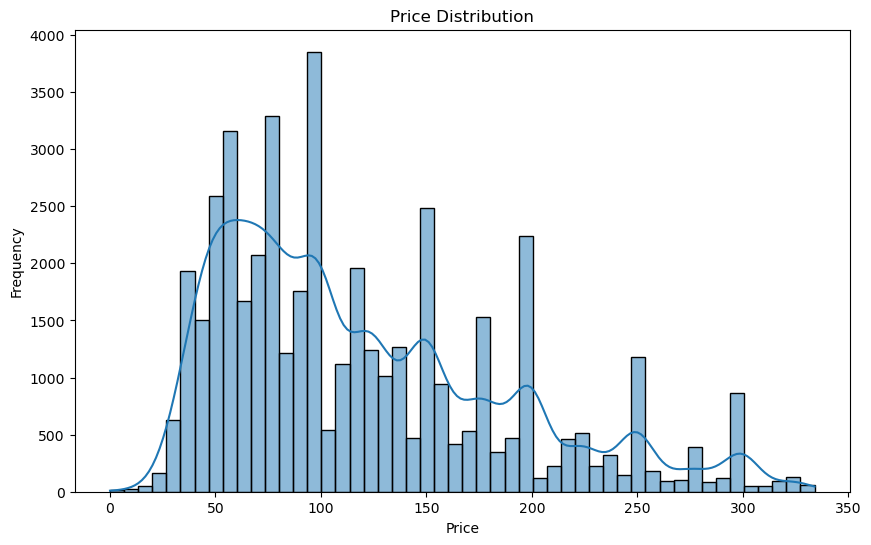

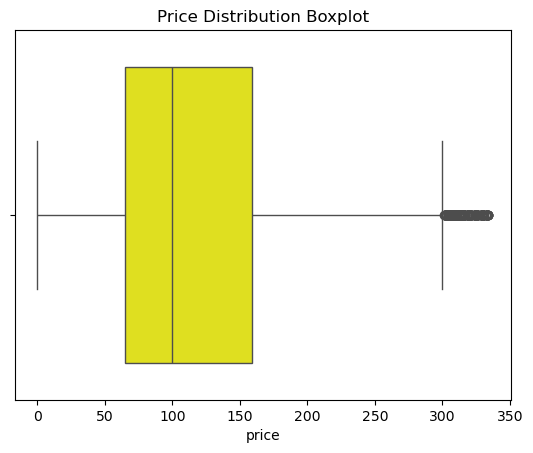

In [ ]:
print(df['price'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=df['price'], color='yellow')
plt.title("Price Distribution Boxplot")
plt.show()

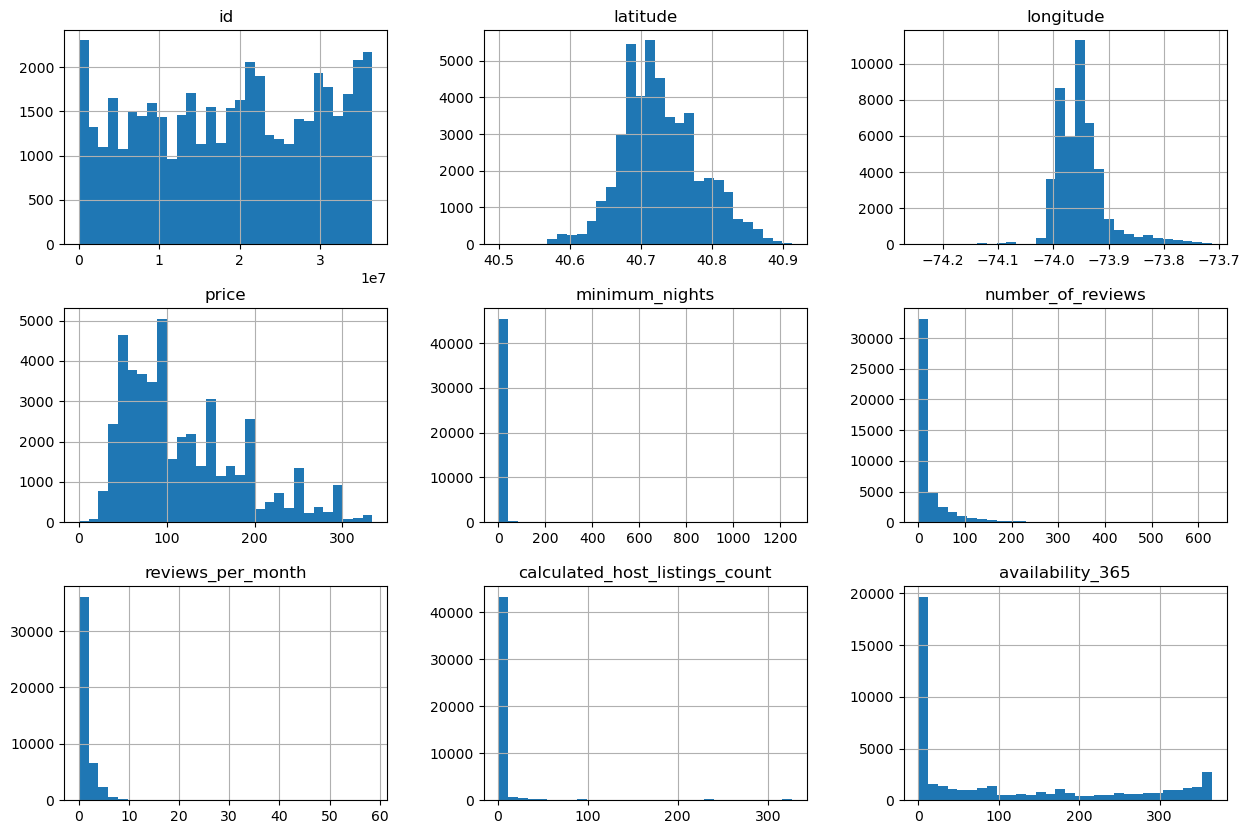

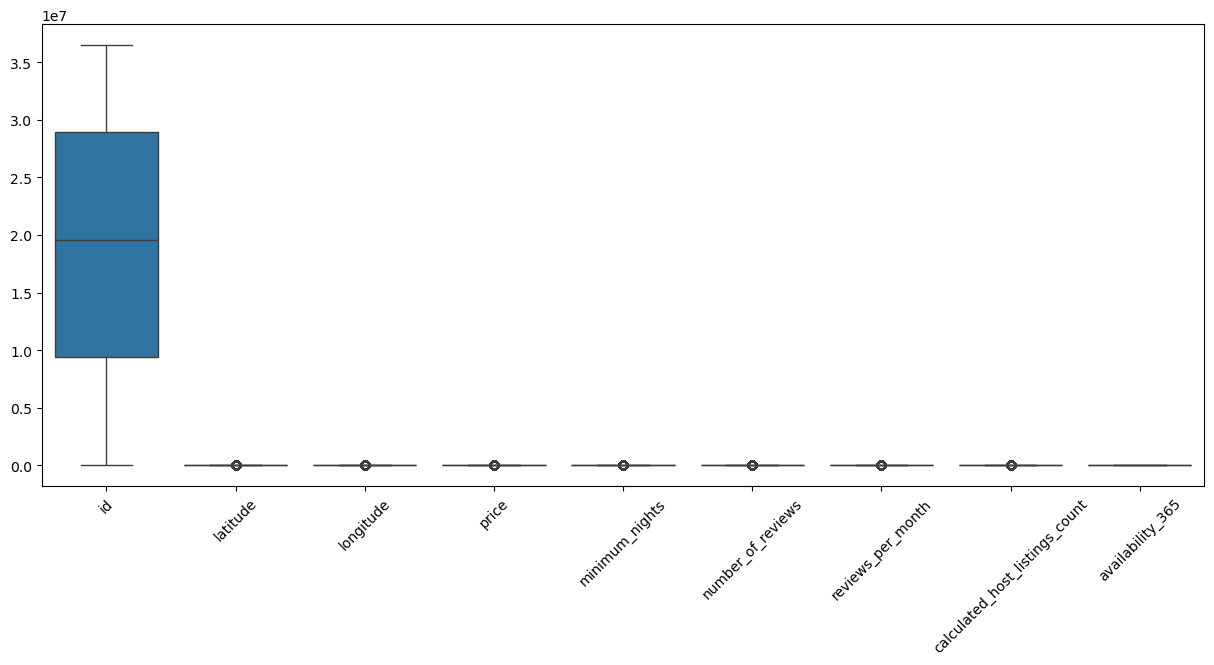

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.show()

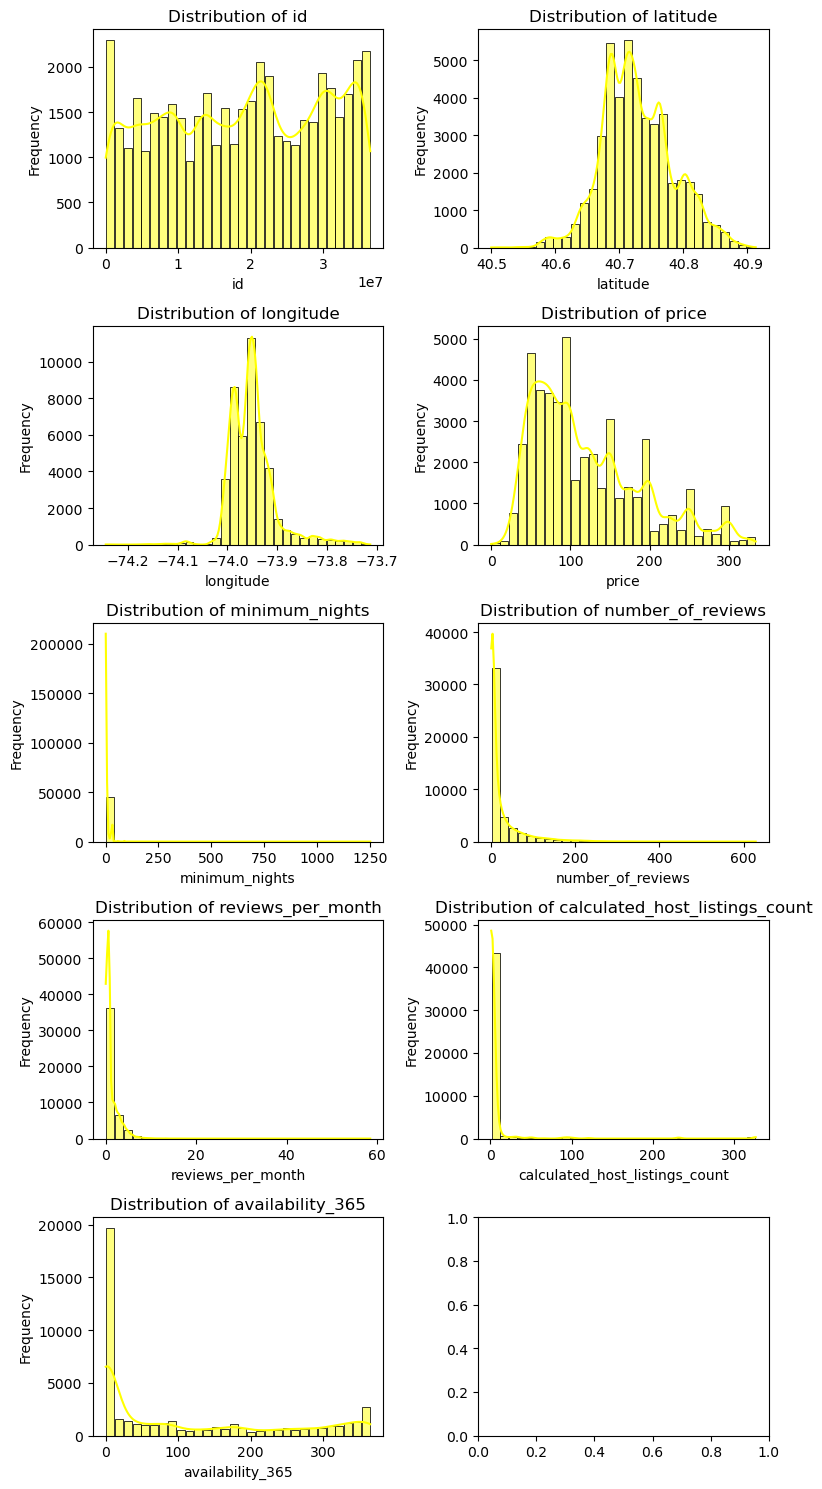

In [ ]:
col_with_no_std = df.select_dtypes(include=np.number).columns.tolist()

num_cols = len(col_with_no_std)

fig, axes = plt.subplots(nrows=(num_cols // 2) + (num_cols % 2), ncols=2, figsize=(8, (num_cols // 2 + 1) * 3))

axes = axes.flatten()

for i, col in enumerate(col_with_no_std):
    sns.histplot(df[col], kde=True, ax=axes[i], color='yellow', bins=30, shrink=0.9)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

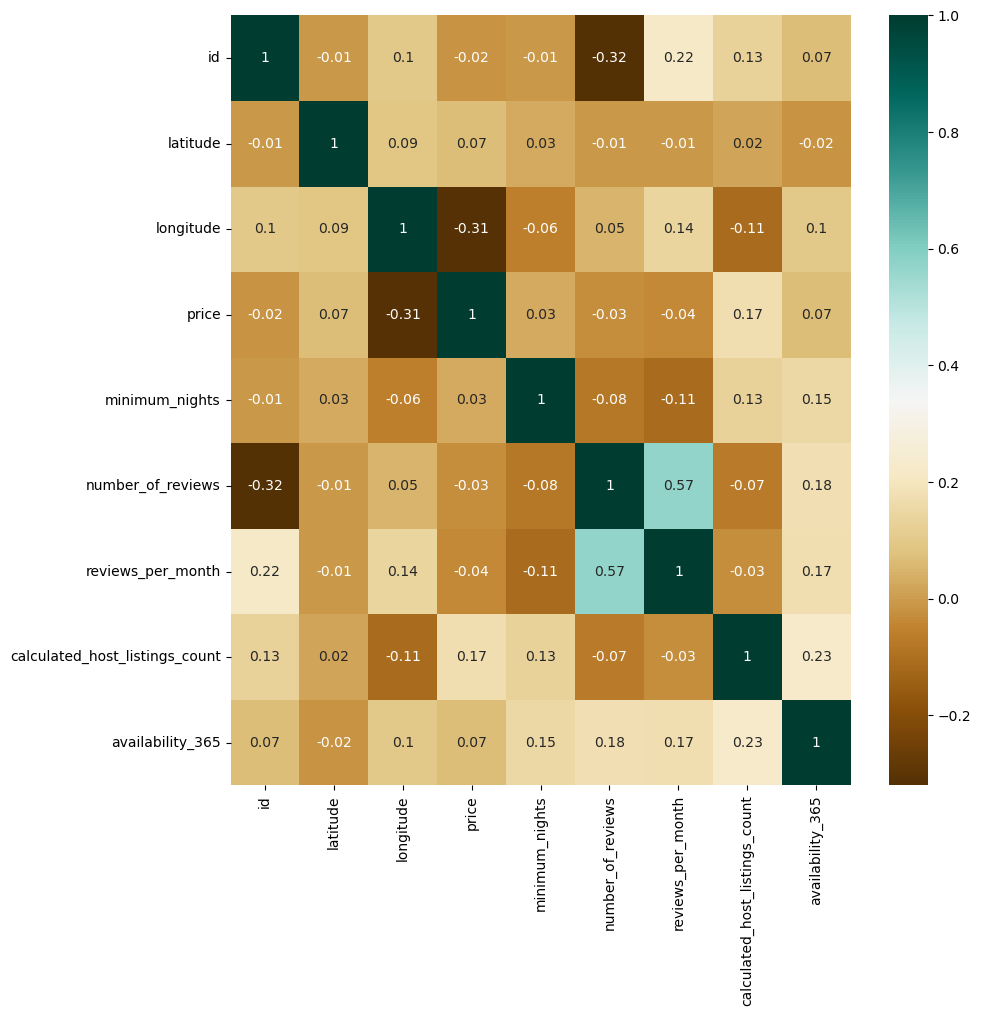

In [ ]:
correlation_matrix = df[col_with_no_std].corr().round(2)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap="BrBG", annot=True)
plt.show()

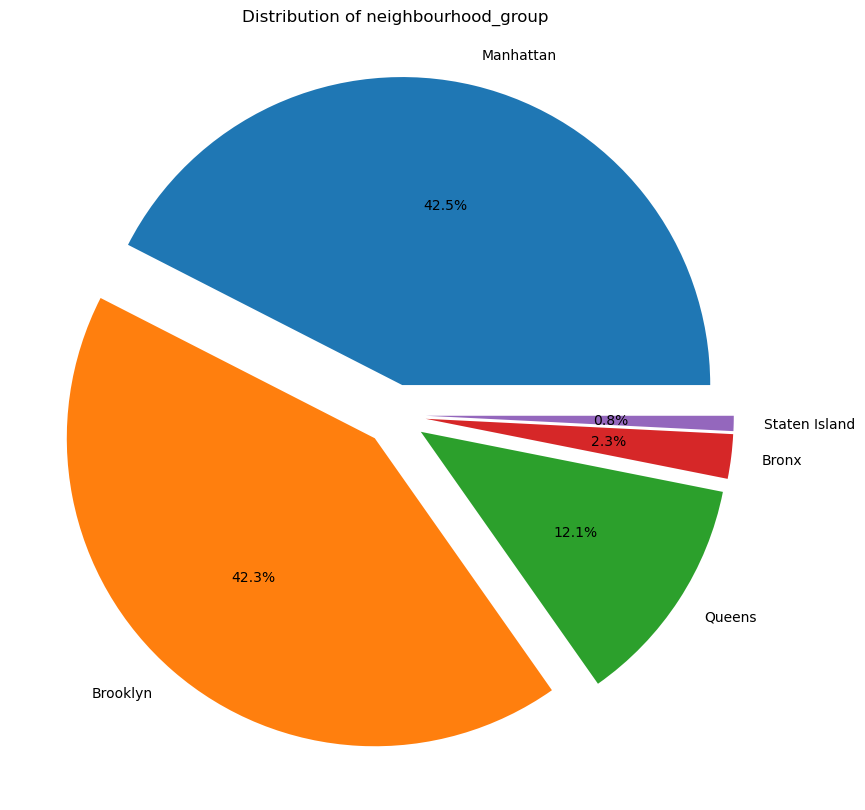

In [ ]:
data = df['neighbourhood_group'].value_counts()
explode = (0.1,) * len(data)

plt.figure(figsize=(10, 10))

data.plot(kind='pie', autopct="%0.1f%%", explode=explode)

plt.title('Distribution of neighbourhood_group')
plt.ylabel('')
plt.show()

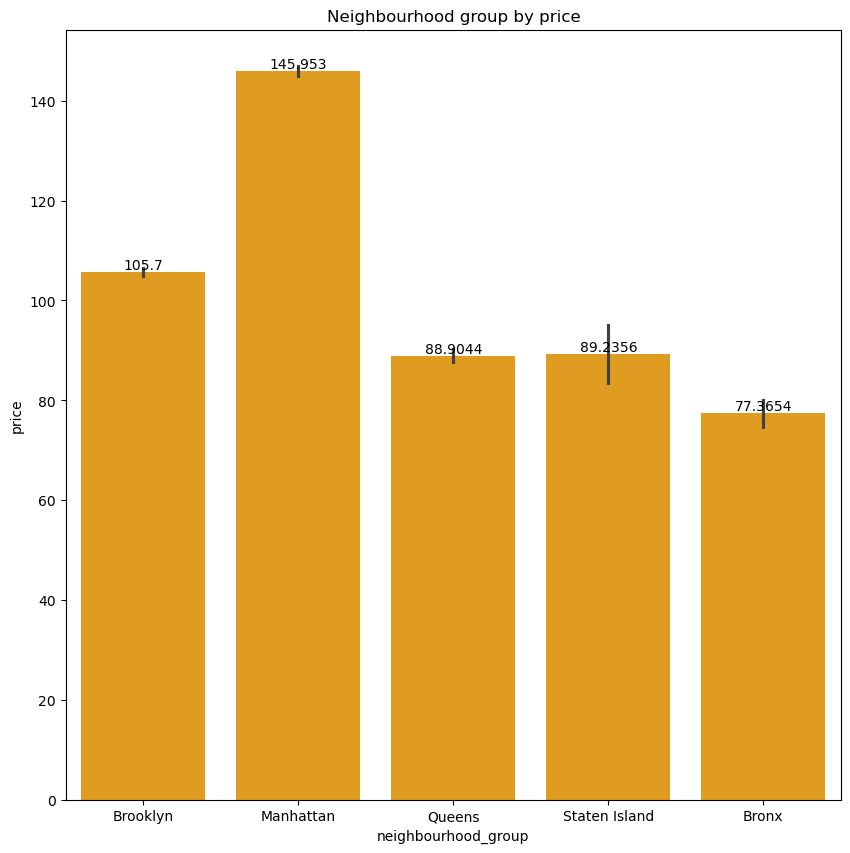

In [ ]:
plt.figure(figsize=(10,10))
y= sns.barplot(data=df, x = 'neighbourhood_group', y='price',color = 'orange')
y.bar_label(y.containers[0])
plt.title('Neighbourhood group by price')
plt.show()

<Axes: xlabel='room_type', ylabel='count'>

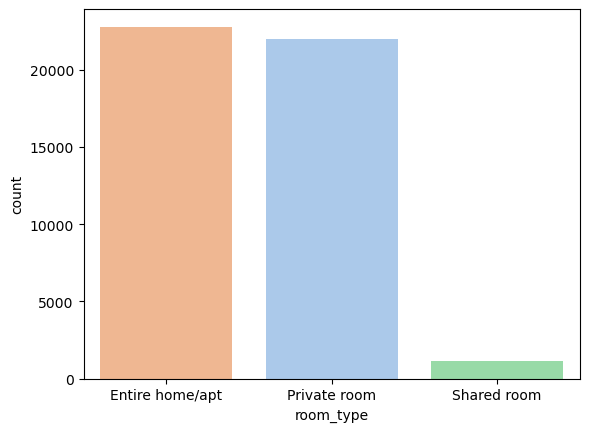

In [ ]:
sns.countplot(x='room_type', data=df, palette='pastel', order=df['room_type'].value_counts().index, hue='room_type')

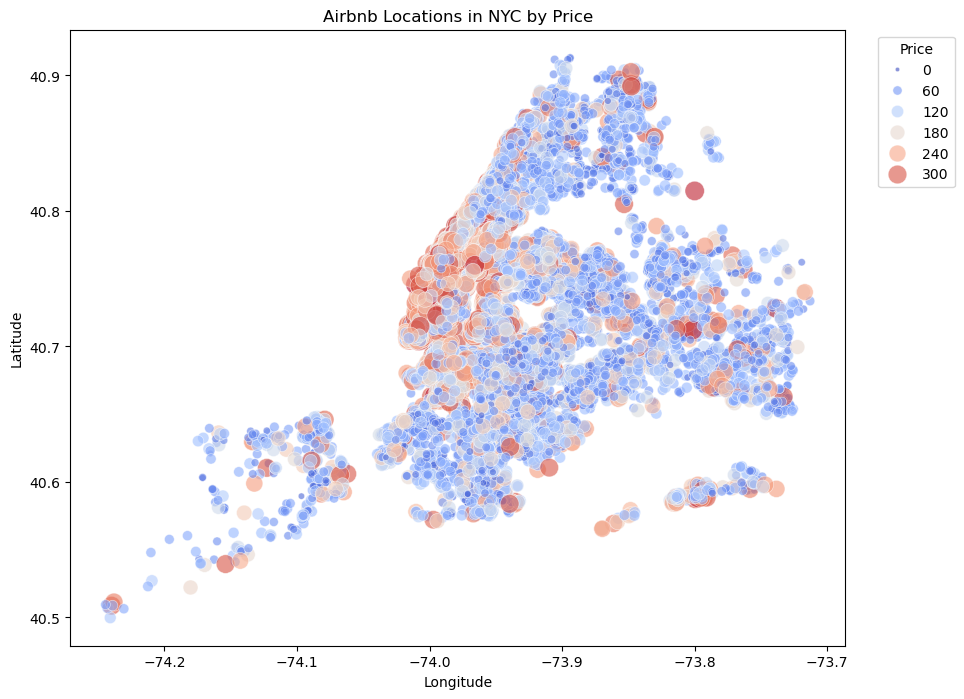

In [ ]:
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='price',
    palette='coolwarm',
    size='price',
    sizes=(10, 200),
    alpha=0.6
)

plt.title('Airbnb Locations in NYC by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


plt.legend(title='Price', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

### FEATURE IMPORTANCE

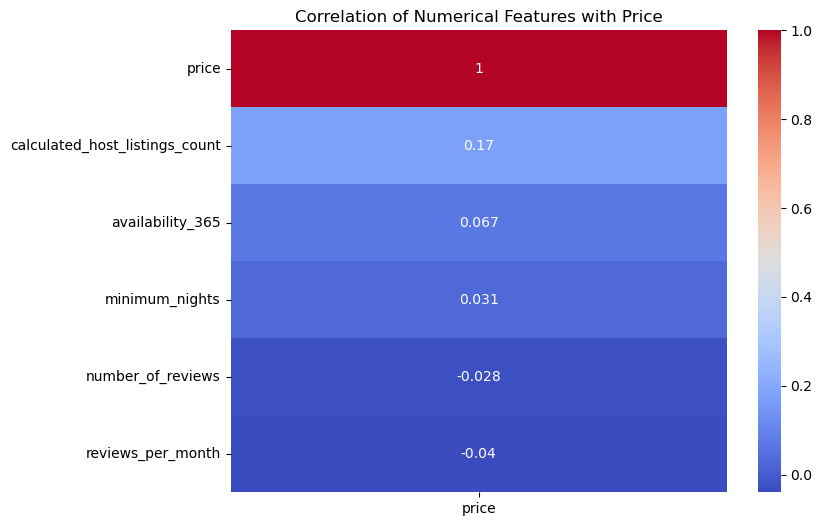

In [ ]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                      'calculated_host_listings_count', 'availability_365']

correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Numerical Features with Price")
plt.show()

In [ ]:
neighbourhood_price_range = df.groupby('neighbourhood_group')['price'].agg(['min', 'max', 'mean', 'median']).sort_values(by='mean', ascending=False)
print("Price Ranges by Neighbourhood Group:")
print(neighbourhood_price_range)

room_type_price_range = df.groupby('room_type')['price'].agg(['min', 'max', 'mean', 'median']).sort_values(by='mean', ascending=False)
print("\nPrice Ranges by Room Type:")
print(room_type_price_range)

Price Ranges by Neighbourhood Group:
                     min  max        mean  median
neighbourhood_group                              
Manhattan              0  334  145.952835   135.0
Brooklyn               0  333  105.699614    90.0
Staten Island         13  300   89.235616    75.0
Queens                10  325   88.904437    74.0
Bronx                  0  325   77.365421    65.0

Price Ranges by Room Type:
                 min  max        mean  median
room_type                                    
Entire home/apt    0  334  162.527096   150.0
Private room       0  333   79.018503    70.0
Shared room        0  320   59.293497    45.0


Numerical Features: Some numerical features show a strong correlation with price, making important for prediction.

Categorical Features:(neighbourhood_group) and (room_type) are significant factors impacting price, providing valuable insights into the pricing structure across various segments.
These insights help inform the selection of key features for building models to predict Airbnb prices.

### TRAIN/VALIDATION/TEST SPLIT

In [ ]:
df_temp, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_temp, test_size=0.25, random_state=1)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

target_train = df_train['price'].values
target_validation = df_val['price'].values
target_test = df_test['price'].values

df_train.drop(columns=['price'], inplace=True)
df_val.drop(columns=['price'], inplace=True)
df_test.drop(columns=['price'], inplace=True)

### DICTVECTORIZER

In [ ]:
train_records = df_train.to_dict(orient='records')
vectorizer = DictVectorizer(sparse=True)
X_train_vectorized = vectorizer.fit_transform(train_records)

validation_records = df_val.to_dict(orient='records')
X_validation_vectorized = vectorizer.transform(validation_records)

test_records = df_test.to_dict(orient='records')
X_test_vectorized = vectorizer.transform(test_records)

print(f'Shape of vectorized training data: {X_train_vectorized.shape}')
print(f'Shape of vectorized validation data: {X_validation_vectorized.shape}')
print(f'Shape of vectorized test data: {X_test_vectorized.shape}')

Shape of vectorized training data: (27553, 233)
Shape of vectorized validation data: (9185, 233)
Shape of vectorized test data: (9185, 233)


### FEATURE IMPORTANCE

In [ ]:
model = DecisionTreeRegressor(max_depth=1, random_state=1)
model.fit(X_train_vectorized, target_train)

feature_importance = model.feature_importances_
important_feature_index = feature_importance.argmax()
important_feature = vectorizer.feature_names_[important_feature_index]

print(f'The feature used for splitting the data is: {important_feature}\n')

The feature used for splitting the data is: room_type=Entire home/apt



### FUNCTION FOR EVALUATION METRICS

In [ ]:
def evaluate_model(predictions, target):
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R²: {r2:.3f}\n')

In [ ]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_vectorized)
X_validation_scaled = scaler.transform(X_validation_vectorized)

### MODEL TRAINING WITH ONE MODEL, NO PARAMETER TUNING.

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, target_train)

LinearRegression()

In [ ]:
linear_val_predictions = linear_model.predict(X_validation_scaled)
print('Linear Regression Model with Scaled Data:')
evaluate_model(linear_val_predictions, target_validation)

Linear Regression Model with Scaled Data:
RMSE: 47.788
MAE: 34.811
R²: 0.519



Linear Regression Model meaning it explains only 16% of the variance in the target variable. Its show struggles with variance, likely due to the model's simplicity in capturing complex relationships.

### TRAINED MULTIPLE MODELS (Desision tree, RandomForestRegressor, XGBRegressor) WITH PARAMETER TUNING

In [ ]:
dt_params = {'max_depth': [1, 5, 10, None], 'min_samples_split': [2, 10, 20]}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=1), dt_params, cv=3)
dt_grid.fit(X_train_vectorized, target_train)
best_dt_model = dt_grid.best_estimator_

In [ ]:
dt_val_predictions = best_dt_model.predict(X_validation_vectorized)
print('Decision Tree Model (Best Parameters):')
evaluate_model(dt_val_predictions, target_validation)

Decision Tree Model (Best Parameters):
RMSE: 48.049
MAE: 34.985
R²: 0.514



Decision Tree Model meaning it explains very little of the variance in the data. This model is less accurate, likely due to overfitting on certain patterns and lacking generalization.

In [ ]:
rf_params = {'n_estimators': [10, 20, 50], 'max_depth': [5, 10, 15], 'min_samples_split': [2, 5]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=1, n_jobs=-1), rf_params, cv=2)
rf_grid.fit(X_train_vectorized, target_train)
best_rf_model = rf_grid.best_estimator_

In [ ]:
rf_val_predictions = best_rf_model.predict(X_validation_vectorized)
print('Random Forest Model (Best Parameters):')
evaluate_model(rf_val_predictions, target_validation)

Random Forest Model (Best Parameters):
RMSE: 44.935
MAE: 32.104
R²: 0.575



Random Forest Model performs slightly better with an R², indicating moderate explanatory power and variance handling. It show improved accuracy due to ensemble learning, which reduces overfitting.

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=1)
xgb_model.fit(X_train_vectorized, target_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_val_predictions = xgb_model.predict(X_validation_vectorized)
print('XGBoost Model Evaluation:')
evaluate_model(xgb_val_predictions, target_validation)

XGBoost Model Evaluation:
RMSE: 44.811
MAE: 32.204
R²: 0.577



XGBoost Model has the best R² score, RMSE, and a low MAE, among the regression models, indicating it captures patterns slightly better. This is due to its boosted ensemble technique, which corrects errors iteratively and enhances predictive performance.

#### NEW FEATURES AND MODELS

In [ ]:
df['latitude_longitude'] = df['latitude'] * df['longitude']
df['reviews_per_month_ratio'] = df['number_of_reviews'] / (df['minimum_nights'] + 1)

### GRADIENT BOOSTING MODEL WITH TUNING

In [ ]:
gb_params = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1]}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=1), gb_params, cv=3, scoring='r2')
gb_grid.fit(X_train_vectorized, target_train)
best_gb_model = gb_grid.best_estimator_

In [ ]:
gb_val_predictions = best_gb_model.predict(X_validation_vectorized)
print('Gradient Boosting Model (Best Parameters):')
evaluate_model(gb_val_predictions, target_validation)

Gradient Boosting Model (Best Parameters):
RMSE: 44.920
MAE: 32.279
R²: 0.575



Gradient Boosting Model shows performance similar to the Decision Tree, with an R², suggesting limited accuracy. This model show that it also struggled to generalize well.

In [ ]:
def evaluate_model(predictions, target):
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    return {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

In [ ]:
evaluation_results = {
    "Linear Regression": evaluate_model(linear_val_predictions, target_validation),
    "Decision Tree": evaluate_model(dt_val_predictions, target_validation),
    "Random Forest": evaluate_model(rf_val_predictions, target_validation),
    "XGBoost": evaluate_model(xgb_val_predictions, target_validation),
    "Gradient Boosting": evaluate_model(gb_val_predictions, target_validation)
}

model_metrics = {
    "Model": list(evaluation_results.keys()),
    "RMSE": [result['RMSE'] for result in evaluation_results.values()],
    "R2 Score": [result['R2'] for result in evaluation_results.values()],
    "MAE": [result['MAE'] for result in evaluation_results.values()]
}

metrics_df = pd.DataFrame(model_metrics)

print(metrics_df)

               Model       RMSE  R2 Score        MAE
0  Linear Regression  47.787701  0.519204  34.811412
1      Decision Tree  48.048948  0.513933  34.985359
2      Random Forest  44.934524  0.574902  32.103915
3            XGBoost  44.811346  0.577230  32.204073
4  Gradient Boosting  44.920484  0.575168  32.278510


### Interpretation:

1. **Best Performing Models**: XGBoost and Gradient Boosting are the top-performing models, achieving the lowest RMSE and highest R² scores. Both models capture the data's variance effectively while maintaining lower prediction errors.

2. **Ensemble Models**: Random Forest, XGBoost, and Gradient Boosting outperform simpler models (Linear Regression and Decision Tree), which demonstrates the power of ensemble techniques in improving accuracy and reducing overfitting.

3. **Linear Regression**: This model has the highest RMSE and lowest R² score, indicating it struggles to capture complex relationships in the data.

4. **Decision Tree**: Though it performs better than Linear Regression, it is prone to overfitting and lacks the generalization power of ensemble models.

### Conclusion:

The XGBoost model is the recommended choice for deployment due to its balance of accuracy, error minimization, and generalization capabilities. Gradient Boosting is a close alternative, demonstrating comparable performance.

### TRAINING MULTIPLE VARIATIONS OF NEURAL NETWORKS WITH TUNED PARAMETERS

In [ ]:
from keras.callbacks import EarlyStopping

def create_nn_model(dropout_rate=0.2, learning_rate=0.001, layer_size=64, additional_layers=False):
    model = Sequential()
    model.add(Dense(layer_size, activation='relu', input_shape=(X_train_vectorized.shape[1],)))
    model.add(Dropout(dropout_rate))

    if additional_layers:
        model.add(Dense(layer_size // 2, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

variations = [
    {'dropout_rate': 0.2, 'learning_rate': 0.001, 'layer_size': 64, 'additional_layers': False},
    {'dropout_rate': 0.3, 'learning_rate': 0.001, 'layer_size': 64, 'additional_layers': True},
    {'dropout_rate': 0.2, 'learning_rate': 0.0005, 'layer_size': 128, 'additional_layers': True},
    {'dropout_rate': 0.4, 'learning_rate': 0.0001, 'layer_size': 32, 'additional_layers': False},
]

trained_models = []
nn_predictions = []

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

for i, params in enumerate(variations):
    print(f'\nTraining Neural Network Variation {i+1} with params: {params}')
    model_nn = create_nn_model(**params)

    model_nn.fit(
        X_train_vectorized,
        target_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_validation_vectorized, target_validation),
        callbacks=[early_stopping],
        verbose=1
    )

    trained_models.append(model_nn)
    nn_val_predictions = model_nn.predict(X_validation_vectorized).flatten()
    nn_predictions.append(nn_val_predictions)
    print(f'Neural Network Model Variation {i+1} completed.')


Training Neural Network Variation 1 with params: {'dropout_rate': 0.2, 'learning_rate': 0.001, 'layer_size': 64, 'additional_layers': False}


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 469570322432.0000 - val_loss: 302465312.0000
Epoch 2/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 1564757504.0000 - val_loss: 69536.1328
Epoch 3/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 28822610.0000 - val_loss: 10444.3525
Epoch 4/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 355270.5625 - val_loss: 8488.0889
Epoch 5/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 9517.7637 - val_loss: 8410.5342
Epoch 6/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 8516.7422 - val_loss: 8403.1943
Epoch 7/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 8620.2197 - val_loss: 8624.7910
Epoch 8/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 8639.3115 - val_loss: 10080.3496
Epoch 9/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 8897.9746 - val_loss: 8513.2461
Epoch 10/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 8892.5439 - val_loss: 11913.8193
Epoch 11/50
862/862 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/

### EVALUATING OF NEURAL NETWORKS

In [ ]:
def evaluate_nn_model(predictions, target):
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    print(f'RMSE: {rmse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R²: {r2:.3f}\n')

    return {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

In [ ]:
nn_results = []
for i, predictions in enumerate(nn_predictions):
    print(f'\nEvaluating Neural Network Variation {i+1}')
    metrics = evaluate_nn_model(predictions, target_validation)
    nn_results.append({
        "Variation": i + 1,
        "RMSE": metrics["RMSE"],
        "MAE": metrics["MAE"],
        "R2": metrics["R2"]
    })

nn_results_df = pd.DataFrame(nn_results)
print(nn_results_df)


Evaluating Neural Network Variation 1
RMSE: 91.669
MAE: 71.810
R²: -0.769


Evaluating Neural Network Variation 2
RMSE: 1294.833
MAE: 1148.984
R²: -351.985


Evaluating Neural Network Variation 3
RMSE: 523.037
MAE: 476.514
R²: -56.596


Evaluating Neural Network Variation 4
RMSE: 14922.983
MAE: 12892.321
R²: -46884.648

   Variation          RMSE           MAE            R2
0          1     91.668943     71.809751     -0.769184
1          2   1294.833307   1148.983934   -351.985107
2          3    523.037022    476.514479    -56.596157
3          4  14922.983165  12892.321478 -46884.648438


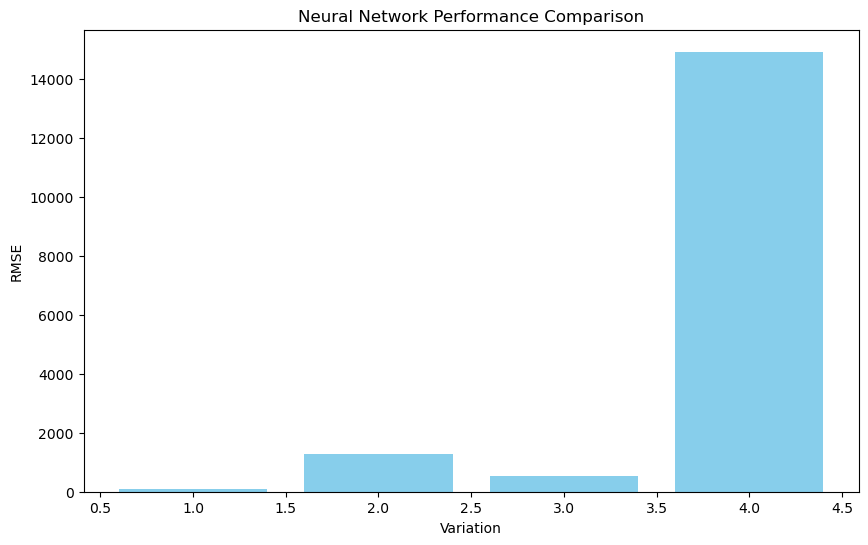

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(nn_results_df['Variation'], nn_results_df['RMSE'], color='skyblue')
plt.xlabel('Variation')
plt.ylabel('RMSE')
plt.title('Neural Network Performance Comparison')
plt.show()

Neural networks showed negative R² values across all variations, indicating that they performed worse than a baseline model. This suggests that the networks struggled with high variance and failed to effectively capture meaningful relationships in the data.

The RMSE values were generally higher for neural networks compared to traditional regression models, further emphasizing their lower accuracy in this context.

Key Insight: These neural network models may require further hyperparameter tuning, feature engineering, or alternative architectures to match or surpass the performance of simpler regression models. This highlights that simpler models can sometimes outperform more complex ones, especially when working with structured or limited datasets.

### SAVING FILE IN PICKLE - TRAINING MODELS             

In [ ]:
import pickle

models = {"Linear Regression": linear_model,
          "Decision Tree": best_dt_model,
          "Random Forest": best_rf_model,
          "XGBoost": xgb_model,
          "Gradient Boosting": best_gb_model}

for model_name, model in models.items():
    with open(f"{model_name.replace(' ', '_').lower()}_model.pkl", "wb") as f:
        pickle.dump(model, f)
    print(f"{model_name} trained and saved as '{model_name.replace(' ', '_').lower()}_model.pkl'")

for i, model_nn in enumerate(trained_models):
    model_path = f"neural_network_model_variation_{i+1}.h5"
    model_nn.save(model_path)
    print(f"Neural Network Variation {i+1} saved as '{model_path}'")

Linear Regression trained and saved as 'linear_regression_model.pkl'
Decision Tree trained and saved as 'decision_tree_model.pkl'
Random Forest trained and saved as 'random_forest_model.pkl'
XGBoost trained and saved as 'xgboost_model.pkl'
Gradient Boosting trained and saved as 'gradient_boosting_model.pkl'
Neural Network Variation 1 saved as 'neural_network_model_variation_1.h5'


Neural Network Variation 2 saved as 'neural_network_model_variation_2.h5'
Neural Network Variation 3 saved as 'neural_network_model_variation_3.h5'
Neural Network Variation 4 saved as 'neural_network_model_variation_4.h5'


### SAVING FILE IN PICKLE - EVALUATIONS MODELS  

In [ ]:
model_files = ["linear_regression_model.pkl",
               "decision_tree_model.pkl",
               "random_forest_model.pkl",
               "xgboost_model.pkl",
               "gradient_boosting_model.pkl"]

evaluation_results = {}

def evaluate_model(predictions, target):
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    return {"RMSE": rmse, "MAE": mae, "R²": r2}

for model_file in model_files:
    with open(model_file, "rb") as f:
        model = pickle.load(f)

    predictions = model.predict(X_validation_vectorized)
    model_name = model_file.replace("_model.pkl", "").title()
    evaluation_results[model_name] = evaluate_model(predictions, target_validation)

nn_evaluation_results = {}

def evaluate_nn_model(predictions, target):
    rmse = np.sqrt(mean_squared_error(target, predictions))
    mae = mean_absolute_error(target, predictions)
    r2 = r2_score(target, predictions)
    return {"RMSE": rmse, "MAE": mae, "R²": r2}

for i, predictions in enumerate(nn_predictions):
    model_name = f"Neural Network Variation {i+1}"
    nn_evaluation_results[model_name] = evaluate_nn_model(predictions, target_validation)

evaluation_results.update(nn_evaluation_results)

with open("evaluation_results.pkl", "wb") as f:
    pickle.dump(evaluation_results, f)

### Best model with the best R² score

In [ ]:
import pickle

with open("evaluation_results.pkl", "rb") as f:
    evaluation_results = pickle.load(f)

print("Loaded evaluation results:")
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}: {metrics}")

best_model_name = max(evaluation_results, key=lambda k: evaluation_results[k]['R²'])
print(f"The best model based on R² is: {best_model_name}")

best_model_file = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
with open(best_model_file, "rb") as f:
    best_model = pickle.load(f)

with open("final_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("The best model has been successfully saved as 'final_model.pkl'")

Loaded evaluation results:
Linear_Regression: {'RMSE': 45365974.5393454, 'MAE': 39269682.461915836, 'R²': -433300471013.2157}
Decision_Tree: {'RMSE': 48.048947649113835, 'MAE': 34.98535906688527, 'R²': 0.5139326693878776}
Random_Forest: {'RMSE': 44.93452423175435, 'MAE': 32.10391512373191, 'R²': 0.57490209253549}
Xgboost: {'RMSE': 44.81134554532651, 'MAE': 32.20407290118637, 'R²': 0.5772295594215393}
Gradient_Boosting: {'RMSE': 44.92048359916994, 'MAE': 32.278509764088604, 'R²': 0.5751677106153954}
Neural Network Variation 1: {'RMSE': 91.66894323351991, 'MAE': 71.8097506081435, 'R²': -0.7691844701766968}
Neural Network Variation 2: {'RMSE': 1294.8333067767317, 'MAE': 1148.983933599625, 'R²': -351.985107421875}
Neural Network Variation 3: {'RMSE': 523.0370224432493, 'MAE': 476.51447874120254, 'R²': -56.59615707397461}
Neural Network Variation 4: {'RMSE': 14922.983165001515, 'MAE': 12892.321477564612, 'R²': -46884.6484375}
The best model based on R² is: Xgboost
The best model has been su

### Best model for neural network

In [ ]:
best_nn_name = max(nn_evaluation_results, key=lambda k: nn_evaluation_results[k]['R²'])
print(f"The best Neural Network model based on R² is: {best_nn_name}")

if evaluation_results[best_model_name]['R²'] < nn_evaluation_results[best_nn_name]['R²']:
    best_model_name = best_nn_name
    # Load the best Neural Network model
    best_model_file = f"neural_network_model_variation_{int(best_nn_name.split()[-1])}.h5"
    from keras.models import load_model
    best_model = load_model(best_model_file)

    best_model.save("final_model.h5")
    print("The best model (NN) has been successfully saved as 'final_model.h5'")
else:
    with open("final_model.pkl", "wb") as f:
        pickle.dump(best_model, f)
    print("The best model (ML) has been successfully saved as 'final_model.pkl'")

The best Neural Network model based on R² is: Neural Network Variation 1
The best model (ML) has been successfully saved as 'final_model.pkl'


In [1]:
!pip install flask

### Flask

In [6]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

app = Flask(__name__)

model_path = "final_model.pkl"
model = pickle.load(open(model_path, 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    try:
        input_data = request.get_json()
        df = pd.DataFrame(input_data)

        prediction = model.predict(df)

        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### Requirements.txt

In [7]:
!pip freeze > requirements.txt

### Docker and Requirements.txt

In [8]:
dockerfile_content = """
# Base image
FROM python:3.8-slim

# Set working directory
WORKDIR /app

# Copy requirements file and install dependencies
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

# Copy the project files into the container
COPY . .

# Run the model service (Flask or FastAPI as an example)
CMD ["python", "predict.py"]
"""

with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)

In [13]:
from google.colab import files
files.download('Dockerfile')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>